# Part 1: Get and clean data

In [73]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
%matplotlib inline

<font color='blue'>First, we will read data from the Wikipedia page</font>

In [45]:
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df

[    Postal code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 5           M6A        North York   
 6           M7A  Downtown Toronto   
 7           M8A      Not assigned   
 8           M9A         Etobicoke   
 9           M1B       Scarborough   
 10          M2B      Not assigned   
 11          M3B        North York   
 12          M4B         East York   
 13          M5B  Downtown Toronto   
 14          M6B        North York   
 15          M7B      Not assigned   
 16          M8B      Not assigned   
 17          M9B         Etobicoke   
 18          M1C       Scarborough   
 19          M2C      Not assigned   
 20          M3C        North York   
 21          M4C         East York   
 22          M5C  Downtown Toronto   
 23          M6C              York   
 24          M7C      Not assigned   
 25         

<font color='blue'>As we can see, the data is not read correctly into dataframe. This is because there are more than one table on the site. So it is necessary to specify the right table, in this case it's the first table, so with index 0</font>

In [46]:
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.rename(columns={'Postal code':'PostalCode'},inplace=True)
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [47]:
df.drop(df[df['Borough']=='Not assigned'].index,inplace=True)
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government



<font color='blue'>Because the dataset is already grouped by postal code and the seperator between different Neighborhood is a ( / ), the following code is to replace this seperator by ( , ) to meet the requirement</font>


In [48]:
df['Neighborhood']=df['Neighborhood'].str.replace(' /',',' )
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


<font color='blue'>The dataset contains a row where the Neighborhood is not seperated correctly, it is the row with postal code **M5V**, where **Bathurst** and **Quay** are not seperated by ( , ). It can by easily seen on the Wikipedia page.   

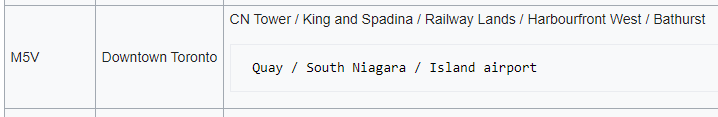
    
The following code serves to add the correct seperator between these two Neighborhoods</font>

In [49]:
print(df[df['PostalCode']=='M5V'].values)
df['Neighborhood']=df['Neighborhood'].str.replace('  ',', ' )
print(df[df['PostalCode']=='M5V'].values)

[['M5V' 'Downtown Toronto'
  'CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst  Quay, South Niagara, Island airport']]
[['M5V' 'Downtown Toronto'
  'CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst, Quay, South Niagara, Island airport']]


<font color='blue'>Then, we fill the not assigned Neighborhoods with the values in Borough column.</font>

In [50]:
df.Neighborhood.replace('Not assigned',df.Borough,inplace=True)
df[df['Neighborhood']=='Not assigned']

,PostalCode,Borough,Neighborhood


In [51]:
df.shape[0]

103

In [52]:
df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"





# Part 2: Get longitude and Latitude  
  
    




In [8]:
!pip install geocoder

     |████████████████████████████████| 102kB 11.2MB/s ta 0:00:01


<font color='blue'>First, we read the data from the provided link and rename the postal code column's name so that it is the same as Part 1.</font>

In [53]:
coors=pd.read_csv('http://cocl.us/Geospatial_data')
coors.rename(columns={'Postal Code': 'PostalCode'},inplace=True)
coors.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<font color='blue'>Then, we merge the two DataFrames by  using PostalCode key</font>

In [54]:
toronto_data=pd.merge(df, coors, on=['PostalCode'])
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494








# Part 3: Explore and cluster the neighborhoods in Toronto

## 3.1. Analysis of each Neighborhood

In [55]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


In [56]:
address = 'Toronto,TO'

geolocator = Nominatim(user_agent="bay")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Toronto,TO are 43.6534817, -79.3839347.


In [57]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [58]:
CLIENT_ID = '4MUHPKIL44EV114RAA4VEAQAOP3ZG0MPWSDSYAHU502RUH0A' # your Foursquare ID
CLIENT_SECRET = 'CYHV2HQXBAFGQV4MZGEYXMA2LQKK0DWKGE2BNI32WBZ2QFUJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4MUHPKIL44EV114RAA4VEAQAOP3ZG0MPWSDSYAHU502RUH0A
CLIENT_SECRET:CYHV2HQXBAFGQV4MZGEYXMA2LQKK0DWKGE2BNI32WBZ2QFUJ


In [59]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            500, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [61]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Ri

In [62]:
print(toronto_venues.shape)
toronto_venues.head()

(2192, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [25]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,56,56,56,56,56,56
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
Business reply mail Processing CentrE,16,16,16,16,16,16


In [26]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 270 uniques categories.


In [27]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1]) #Create list of columnseorganize the columns so that the Neighborhood column is the first one
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
toronto_onehot.shape

(2192, 270)

In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [30]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1  Latin American Restaurant  0.25
2               Skating Rink  0.25
3             Breakfast Spot  0.25
4   Mediterranean Restaurant  0.00


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place   0.2
1           Gym   0.1
2  Skating Rink   0.1
3  Dance Studio   0.1
4   Coffee Shop   0.1


----Bathurst Manor, Wilson Heights, Downsview North----
            venue  freq
0            Bank  0.09
1     Coffee Shop  0.09
2        Pharmacy  0.05
3   Deli / Bodega  0.05
4  Sandwich Place  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1                 Bank  0.25
2  Japanese Restaurant  0.25
3   Chinese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.09
1         Coffee Shop  0.09
2  Italian Restaurant  0.09
3          Restaurant  0.09
4            Pharmacy

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [109]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Lounge,Breakfast Spot,Latin American Restaurant,Women's Store,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
1,"Alderwood, Long Branch",Pizza Place,Gym,Skating Rink,Sandwich Place,Dance Studio,Pub,Pool,Coffee Shop,Pharmacy,Colombian Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Diner,Ice Cream Shop,Supermarket,Deli / Bodega,Sushi Restaurant,Middle Eastern Restaurant,Restaurant,Pizza Place
3,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Women's Store
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Coffee Shop,Italian Restaurant,Restaurant,Juice Bar,Thai Restaurant,Liquor Store,Fast Food Restaurant,Indian Restaurant,Pub


## 3.2. Clustering of Neighborhoods

In [110]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [111]:
kmeans.labels_.shape

(94,)

In [112]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(10) # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Empanada Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,4.0,Coffee Shop,Pizza Place,Intersection,Portuguese Restaurant,Hockey Arena,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4.0,Coffee Shop,Park,Pub,Bakery,Restaurant,Breakfast Spot,Mexican Restaurant,Theater,Café,Electronics Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4.0,Clothing Store,Women's Store,Boutique,Furniture / Home Store,Event Space,Miscellaneous Shop,Coffee Shop,Vietnamese Restaurant,Accessories Store,Deli / Bodega
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4.0,Coffee Shop,Diner,Gym,Creperie,Music Venue,Mexican Restaurant,Juice Bar,Italian Restaurant,Hobby Shop,Wings Joint
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.0,Construction & Landscaping,Fast Food Restaurant,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
7,M3B,North York,Don Mills,43.745906,-79.352188,4.0,Gym,Coffee Shop,Restaurant,Beer Store,Japanese Restaurant,Supermarket,Concert Hall,Clothing Store,Chinese Restaurant,Caribbean Restaurant
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,4.0,Pizza Place,Bank,Bus Line,Café,Gym / Fitness Center,Intersection,Pet Store,Pharmacy,Gastropub,Athletics & Sports
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4.0,Clothing Store,Coffee Shop,Cosmetics Shop,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Café,Electronics Store,Italian Restaurant,Furniture / Home Store


In [117]:
toronto_merged=toronto_merged.dropna().reset_index(drop=True)
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1.0,Park,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Empanada Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,4.0,Coffee Shop,Pizza Place,Intersection,Portuguese Restaurant,Hockey Arena,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4.0,Coffee Shop,Park,Pub,Bakery,Restaurant,Breakfast Spot,Mexican Restaurant,Theater,Café,Electronics Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4.0,Clothing Store,Women's Store,Boutique,Furniture / Home Store,Event Space,Miscellaneous Shop,Coffee Shop,Vietnamese Restaurant,Accessories Store,Deli / Bodega
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4.0,Coffee Shop,Diner,Gym,Creperie,Music Venue,Mexican Restaurant,Juice Bar,Italian Restaurant,Hobby Shop,Wings Joint


<font color='blue'>Because the Cluster Labels column is of float type, we have to convert it to integer. </font>

In [150]:
toronto_merged=toronto_merged.astype({'Cluster Labels': 'int32'})
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1,Park,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Empanada Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,4,Coffee Shop,Pizza Place,Intersection,Portuguese Restaurant,Hockey Arena,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Park,Pub,Bakery,Restaurant,Breakfast Spot,Mexican Restaurant,Theater,Café,Electronics Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4,Clothing Store,Women's Store,Boutique,Furniture / Home Store,Event Space,Miscellaneous Shop,Coffee Shop,Vietnamese Restaurant,Accessories Store,Deli / Bodega
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Diner,Gym,Creperie,Music Venue,Mexican Restaurant,Juice Bar,Italian Restaurant,Hobby Shop,Wings Joint


In [143]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 3.3. Examine each cluster

### Cluster 1

In [144]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,0,Construction & Landscaping,Fast Food Restaurant,Women's Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
54,North York,0,Baseball Field,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store,Event Space
97,Etobicoke,0,Construction & Landscaping,Baseball Field,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Women's Store,Department Store


### Cluster 2

In [146]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,1,Park,Food & Drink Shop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Empanada Restaurant
19,York,1,Park,Market,Women's Store,College Rec Center,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
33,East York,1,Park,Coffee Shop,Convenience Store,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store
47,North York,1,Park,Basketball Court,Bakery,Construction & Landscaping,Dumpling Restaurant,Drugstore,Donut Shop,Eastern European Restaurant,Doner Restaurant,Deli / Bodega
58,Central Toronto,1,Park,Bus Line,Swim School,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Dance Studio
61,York,1,Park,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Ethiopian Restaurant
63,North York,1,Park,Bank,Convenience Store,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
65,Central Toronto,1,Park,Jewelry Store,Sushi Restaurant,Trail,Bus Line,Drugstore,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run
74,Etobicoke,1,Park,Pizza Place,Sandwich Place,Mobile Phone Shop,College Rec Center,College Gym,Drugstore,Donut Shop,Doner Restaurant,Dog Run
80,Central Toronto,1,Park,Summer Camp,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dance Studio


### Cluster 3

In [147]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Central Toronto,2,Garden,Women's Store,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dance Studio


### Cluster 4

In [148]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,North York,3,Cafeteria,Women's Store,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dance Studio


### Cluster 5

In [149]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,4,Coffee Shop,Pizza Place,Intersection,Portuguese Restaurant,Hockey Arena,Diner,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
2,Downtown Toronto,4,Coffee Shop,Park,Pub,Bakery,Restaurant,Breakfast Spot,Mexican Restaurant,Theater,Café,Electronics Store
3,North York,4,Clothing Store,Women's Store,Boutique,Furniture / Home Store,Event Space,Miscellaneous Shop,Coffee Shop,Vietnamese Restaurant,Accessories Store,Deli / Bodega
4,Downtown Toronto,4,Coffee Shop,Diner,Gym,Creperie,Music Venue,Mexican Restaurant,Juice Bar,Italian Restaurant,Hobby Shop,Wings Joint
6,North York,4,Gym,Coffee Shop,Restaurant,Beer Store,Japanese Restaurant,Supermarket,Concert Hall,Clothing Store,Chinese Restaurant,Caribbean Restaurant
7,East York,4,Pizza Place,Bank,Bus Line,Café,Gym / Fitness Center,Intersection,Pet Store,Pharmacy,Gastropub,Athletics & Sports
8,Downtown Toronto,4,Clothing Store,Coffee Shop,Cosmetics Shop,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Café,Electronics Store,Italian Restaurant,Furniture / Home Store
9,North York,4,Pizza Place,Park,Pub,Japanese Restaurant,Donut Shop,Drugstore,Doner Restaurant,Dog Run,Distribution Center,Curling Ice
10,Scarborough,4,History Museum,Bar,Construction & Landscaping,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Women's Store
11,North York,4,Gym,Coffee Shop,Restaurant,Beer Store,Japanese Restaurant,Supermarket,Concert Hall,Clothing Store,Chinese Restaurant,Caribbean Restaurant
